In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import scipy.stats as stats

In [2]:
data = xr.open_dataset('E://hadisd.3.3.0.2022f_19310101-20230101_080001-99999.nc')

In [5]:
data

<xarray.Dataset>
Dimensions:                (coordinate_length: 1, time: 162806, test: 71, flagged: 19, reporting_v: 19, reporting_t: 1104, reporting_2: 2)
Coordinates:
    longitude              (coordinate_length) float64 ...
    latitude               (coordinate_length) float64 ...
    elevation              (coordinate_length) float64 ...
  * time                   (time) datetime64[ns] 2004-05-10 ... 2022-12-31T23...
Dimensions without coordinates: coordinate_length, test, flagged, reporting_v, reporting_t, reporting_2
Data variables: (12/27)
    station_id             |S12 ...
    temperatures           (time) float64 ...
    dewpoints              (time) float64 ...
    slp                    (time) float64 ...
    stnlp                  (time) float64 ...
    windspeeds             (time) float64 ...
    ...                     ...
    wind_gust              (time) float64 ...
    past_sigwx1            (time) float64 ...
    input_station_id       (time) object ...
    quality_control_flags  (time, test) float64 ...
    flagged_obs            (time, flagged) float64 ...
    reporting_stats        (reporting_v, reporting_t, reporting_2) float64 ...
Attributes: (12/39)
    title:                       HadISD
    institution:                 Met Office Hadley Centre, Exeter, UK
    source:                      HadISD data product
    references:                  Dunn, 2019, Met Office Hadley Centre Technic...
    creator_name:                Robert Dunn
    creator_url:                 www.metoffice.gov.uk
    ...                          ...
    station_information:         Where station is a composite the station id ...
    Conventions:                 CF-1.6
    Metadata_Conventions:        Unidata Dataset Discovery v1.0, CF Discrete ...
    featureType:                 timeSeries
    processing_date:             06-Jan-2023
    history:                     Created by mk_netcdf_files.py \nDuplicate Mo...

# Gathering data by year  

In [10]:
year_group = list(data['windspeeds'].groupby(data.time.dt.year))

In [16]:
sample_times = list(map(lambda x: len(x[1]), year_group))

**At different years, the observation times are different**  
Some have more frequent observing times,while others have less frequent observations. We want to sample data to have a nearly consistent size.

In [30]:
sample_times

([5592,
  8709,
  8729,
  8719,
  8767,
  8731,
  8747,
  8739,
  8773,
  8752,
  8735,
  8747,
  8756,
  8743,
  8732,
  8727,
  8754,
  8636,
  8718],
 19)

# The wind speed generally follows the Weibull distribution

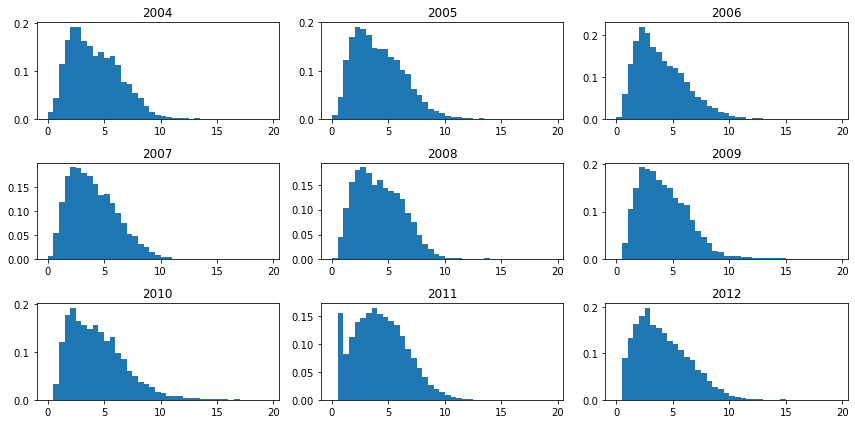

In [77]:
fig,axs = plt.subplots(3,3,figsize=(12,6),tight_layout=True)
for i,ax in (zip(np.arange(9),axs.flat)):
    ax.hist(year_group[i][1].values,bins=np.arange(0,20,.5),density=True)
    ax.set_title(year_group[i][0])

**Let's fit the PDF with data to get four parameters (a, c, loc, scale) of the explicit expression of Weibull distribution**

In [63]:
a,c,loc,scale = stats.exponweib.fit(year_group[0][1].dropna(dim='time').values)

In [74]:
a,c,loc,scale

(0.9413311073736765, 1.985378001491422, -0.1286389036915867, 4.854279150914358)

**The wind speed distribution can be obtained, denoted as "rv"**

In [67]:
rv = stats.exponweib(a,c,loc,scale)

Text(0, 0.5, 'pdf')

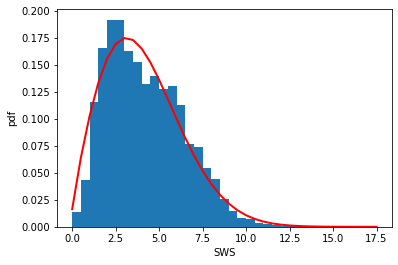

In [146]:
fig,ax = plt.subplots()
x = np.arange(0,18,.5)
ax.plot(x,rv.pdf(x),lw=2,color='r')
ax.hist(year_group[0][1].values,bins=np.arange(0,18,.5),density=True)
plt.xlabel('SWS')
plt.ylabel('pdf')

# To get samples from a given distribution

**Inverse CDF**

Text(0, 0.5, 'cdf')

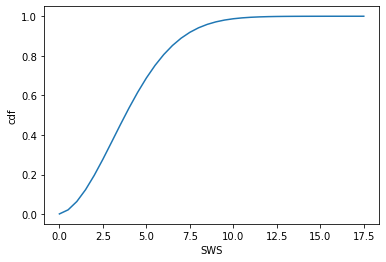

In [147]:
plt.plot(x,rv.cdf(x))
plt.xlabel('SWS')
plt.ylabel('cdf')

**Here using "rv.rvs(size=#)" can give certain size of samples from the given distribution**

(array([0.05923695, 0.14156627, 0.16365462, 0.16064257, 0.1626506 ,
        0.11646586, 0.08835341, 0.04718876, 0.03815261, 0.01305221,
        0.00401606, 0.00401606, 0.        , 0.00100402, 0.        ,
        0.        , 0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <BarContainer object of 17 artists>)

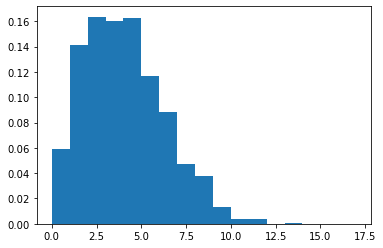

In [158]:
fig,ax = plt.subplots()
ax.hist(rv.rvs(size=1000),bins=np.arange(0,18,1),density=True)